In [8]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import env
import wrangle
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import scott_wrangle
#splits, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Imports Successful


In [19]:
df = wrangle.wrangle_curriculum_logs()

In [20]:
df.head()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
date,,,,,,,,
2018-01-26,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,javascript-i/introduction/working-with-data-ty...,39,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26,javascript-i/javascript-with-html,39,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26,javascript-i/javascript-with-html,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26,javascript-i/functions,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 to 2021-04-21
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   endpoint    900222 non-null  object
 1   user_id     900223 non-null  int64 
 2   cohort_id   900223 non-null  int64 
 3   source_ip   900223 non-null  object
 4   name        900223 non-null  object
 5   start_date  900223 non-null  object
 6   end_date    900223 non-null  object
 7   program_id  900223 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 61.8+ MB


In [22]:
df.program_id.value_counts()

2    713365
3    103412
0     52893
1     30548
4         5
Name: program_id, dtype: int64

In [23]:
df.sample(10)

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
date,,,,,,,,
2018-02-01,javascript-i/arrays,3,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2019-06-29,spring/fundamentals/form-model-binding,394,31,24.243.71.31,Andromeda,2019-03-18,2019-07-30,2
2019-08-30,appendix/cli/7-more-topics,482,34,97.105.19.58,Bayes,2019-08-19,2020-01-30,3
2018-05-22,mysql/basic-statements,131,23,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2
2018-11-13,html-css,302,27,97.105.19.58,Yosemite,2018-11-05,2019-04-03,2
2020-03-20,java-i,551,53,108.200.131.128,Fortuna,2020-01-13,2020-06-23,2
2018-09-26,java-i,234,25,97.105.19.58,Wrangell,2018-07-23,2018-11-29,2
2021-01-22,python/dataframes,847,133,68.201.242.151,Easley,2020-12-07,2021-06-08,3
2018-12-19,slides/interfaces_and_abstract_classes,313,1,173.173.121.126,Arches,2014-02-04,2014-04-22,1


In [30]:
df.end_date=df.end_date.astype('datetime64')

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 to 2021-04-21
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   endpoint    900222 non-null  object        
 1   user_id     900223 non-null  int64         
 2   cohort_id   900223 non-null  int64         
 3   source_ip   900223 non-null  object        
 4   name        900223 non-null  object        
 5   start_date  900223 non-null  object        
 6   end_date    900223 non-null  datetime64[ns]
 7   program_id  900223 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 61.8+ MB


In [53]:
dfa= df[df.index>df.end_date]

In [54]:
dfa

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
date,,,,,,,,
2018-01-26,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,/,11,1,97.105.19.61,Arches,2014-02-04,2014-04-22,1
2018-01-26,mysql/relationships/joins,48,0,97.105.19.61,Unknown cohort,2000-01-01,2000-01-01,0
2018-01-26,mysql/relationships,48,0,97.105.19.61,Unknown cohort,2000-01-01,2000-01-01,0
2018-01-26,mysql/database-design,48,0,97.105.19.61,Unknown cohort,2000-01-01,2000-01-01,0
...,...,...,...,...,...,...,...,...
2021-04-21,fundamentals/ml-methodologies-drawing.jpg,11,28,76.185.131.226,Staff,2014-02-04,2014-02-04,2
2021-04-21,fundamentals/modern-data-scientist.jpg,11,28,76.185.131.226,Staff,2014-02-04,2014-02-04,2
2021-04-21,fundamentals/AI-ML-DL-timeline.jpg,11,28,76.185.131.226,Staff,2014-02-04,2014-02-04,2


In [58]:
dfav=dfa.endpoint.value_counts().head(10)

In [61]:
dfav.head()

/                           19983
search/search_index.json     6159
javascript-i                 5745
spring                       4903
html-css                     4186
Name: endpoint, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

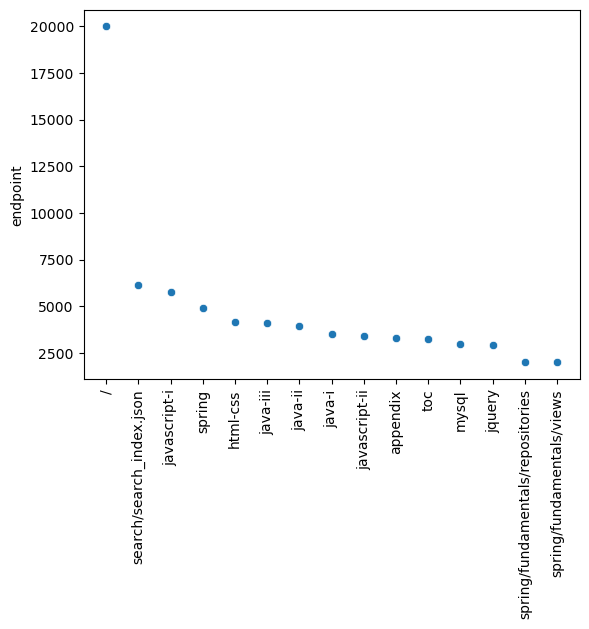

In [66]:
sns.scatterplot(data=dfav,)
plt.xticks(rotation=90)

In [70]:
dfaa= df[df.index>df.end_date]

In [71]:
dfa1 = dfaa[dfaa.program_id ==1]

In [73]:
dfa2 = dfaa[dfaa.program_id ==2]

In [74]:
dfa3 = dfaa[dfaa.program_id ==3]

In [75]:
dfa4 = dfaa[dfaa.program_id ==4]

In [76]:
dfa0 = dfaa[dfaa.program_id ==0]

In [81]:
dfa0.endpoint.value_counts().head(15)

/                             4459
search/search_index.json      1985
javascript-i                   780
toc                            706
spring                         641
java-iii                       567
html-css                       508
java-ii                        508
jquery                         484
javascript-ii                  436
mysql                          422
java-i                         398
Intro_to_Regression_Module     397
Regression_Python              355
html-css/elements              349
Name: endpoint, dtype: int64

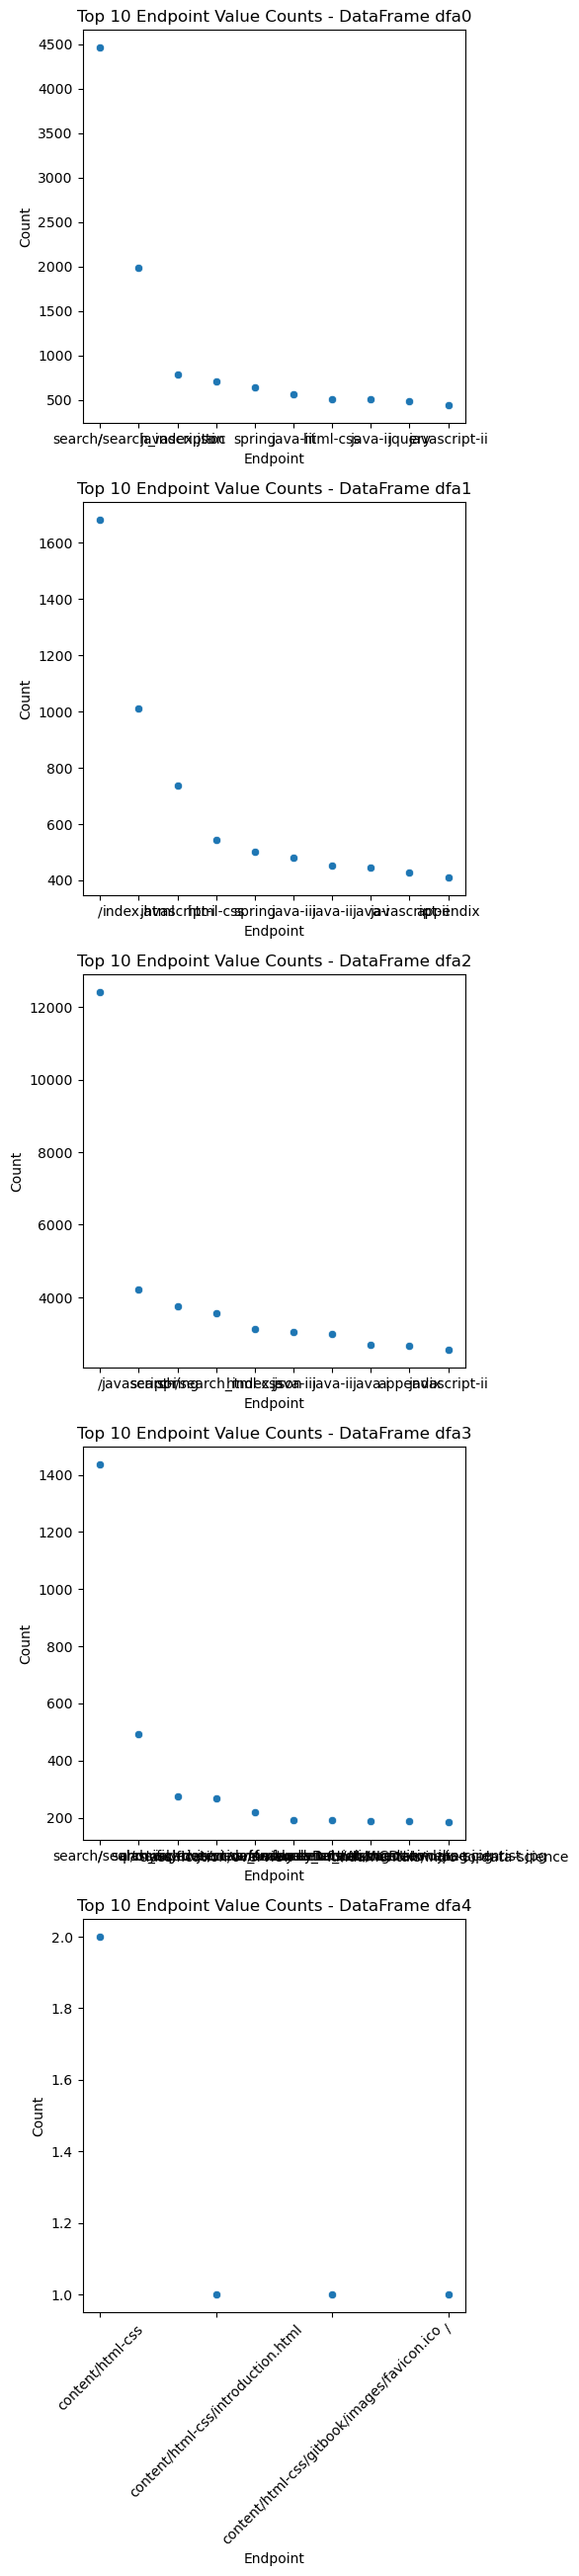

In [87]:




data_frames = [dfa0, dfa1, dfa2, dfa3, dfa4]

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=len(data_frames), figsize=(5, 6 * len(data_frames)))

# Iterate over the DataFrames and plot the scatter plots
for i, df in enumerate(data_frames):
    # Calculate the top 10 endpoint value counts
    top_10 = df['endpoint'].value_counts().head(10)

    # Convert the value counts to a DataFrame for easier plotting
    df_top_10 = pd.DataFrame({'Endpoint': top_10.index, 'Count': top_10.values})

    # Plot the scatter plot
    ax = sns.scatterplot(data=df_top_10, x='Endpoint', y='Count', ax=axes[i])

    # Set plot title and axis labels
    ax.set_title(f'Top 10 Endpoint Value Counts - DataFrame dfa{i}')
    ax.set_xlabel('Endpoint')
    ax.set_ylabel('Count')
    plt.xticks(rotation=45)
# Adjust spacing between subplots
#plt.tight_layout()

# Show the plot
plt.show()


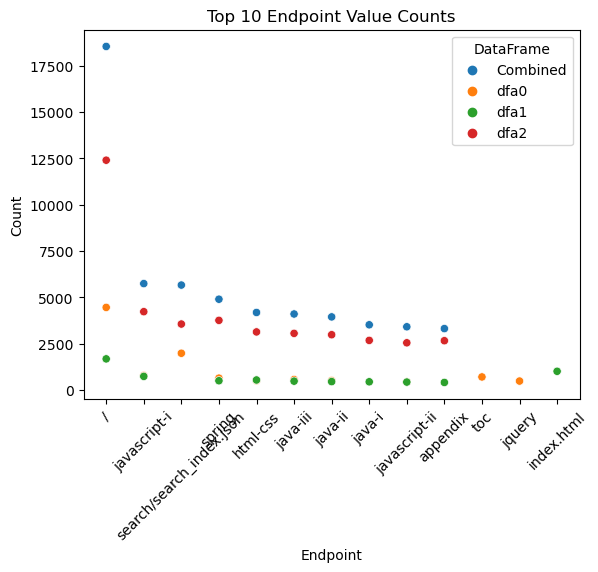

In [89]:


data_frames = [dfa0, dfa1, dfa2]

# Combine the DataFrames into a single DataFrame
combined_df = pd.concat(data_frames)

# Calculate the top 10 endpoint value counts for the combined DataFrame
top_10 = combined_df['endpoint'].value_counts().head(10)

# Convert the value counts to a DataFrame for easier plotting
df_top_10 = pd.DataFrame({'Endpoint': top_10.index, 'Count': top_10.values, 'DataFrame': 'Combined'})

# Iterate over the DataFrames and plot the scatter plots
for i, df in enumerate(data_frames):
    # Calculate the top 10 endpoint value counts
    top_10 = df['endpoint'].value_counts().head(10)

    # Convert the value counts to a DataFrame for easier plotting
    df_top_10_individual = pd.DataFrame({'Endpoint': top_10.index, 'Count': top_10.values, 'DataFrame': f'dfa{i}'})

    # Append the individual DataFrame top 10 counts to the combined DataFrame
    df_top_10 = df_top_10.append(df_top_10_individual)

# Create the scatter plot with hue
sns.scatterplot(data=df_top_10, x='Endpoint', y='Count', hue='DataFrame')

# Set plot title and axis labels
plt.title('Top 10 Endpoint Value Counts')
plt.xlabel('Endpoint')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()


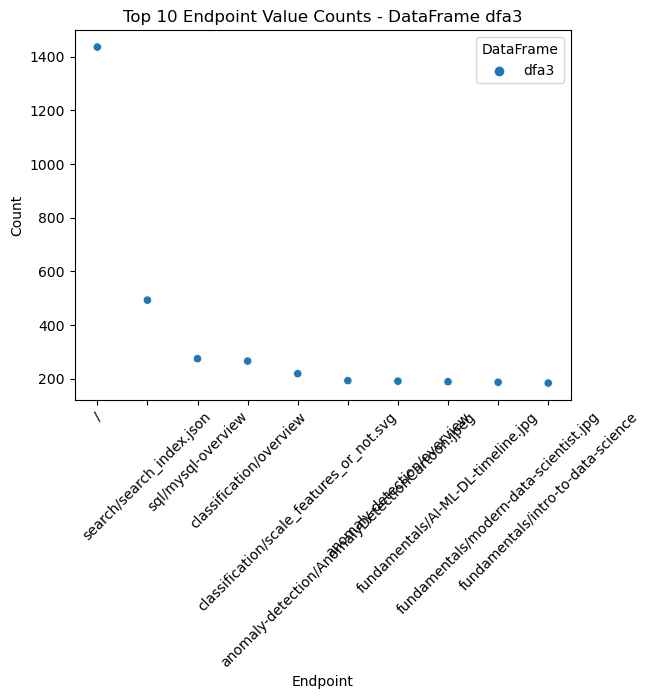

In [91]:
top_10_dfa3 = dfa3['endpoint'].value_counts().head(10)
df_top_10_dfa3 = pd.DataFrame({'Endpoint': top_10_dfa3.index, 'Count': top_10_dfa3.values, 'DataFrame': 'dfa3'})

sns.scatterplot(data=df_top_10_dfa3, x='Endpoint', y='Count', hue='DataFrame')
plt.title('Top 10 Endpoint Value Counts - DataFrame dfa3')
plt.xlabel('Endpoint')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [110]:
df = wrangle.wrangle_curriculum_logs()

In [147]:
def question6(df):
    '''
    This function creates a list of web dev and data science programs
    It then finds the Top 10 lessons most commonly accessed post graduation
    Finally it creates a visualization of them 
    '''
    # selecting post grad access rows
    df_postgrad= df[df.index>df.end_date]
    # splitting to web dev (prog 0-2) and data science (prog 3)
    web_dev = df_postgrad[df_postgrad.program_id <3]
    data_science = df_postgrad[df_postgrad.program_id ==3]
    data_frames = [web_dev, data_science]

    # Create a figure and axes for the subplots
    fig, axes = plt.subplots(nrows=len(data_frames), figsize=(12, 4 * len(data_frames)))
    
    # Iterate over the DataFrames and plot the scatter plots
    for i, df in enumerate(data_frames):
        # Calculate the top 10 endpoint value counts
        top_10 = df['endpoint'].value_counts().head(11)[1:]
    
        # Convert the value counts to a DataFrame for easier plotting
        df_top_10 = pd.DataFrame({'Endpoint': top_10.index, 'Count': top_10.values})
    
        # Plot the scatter plot
        ax = sns.scatterplot(data=df_top_10, x='Endpoint', y='Count', ax=axes[i])
    
        # Set plot title
        if i == 0:
            title = 'Web Dev'
        else:
            title = 'Data Science'
        # Set plot title and axis labels
        ax.set_title(f'Top 10 Endpoint Value Counts - {title}')
        ax.set_xlabel('Endpoint')
        ax.set_ylabel('Count')
        plt.xticks(rotation=90)
    # Adjust spacing between subplots
    plt.tight_layout()
    # Show the plot
    plt.show()
    

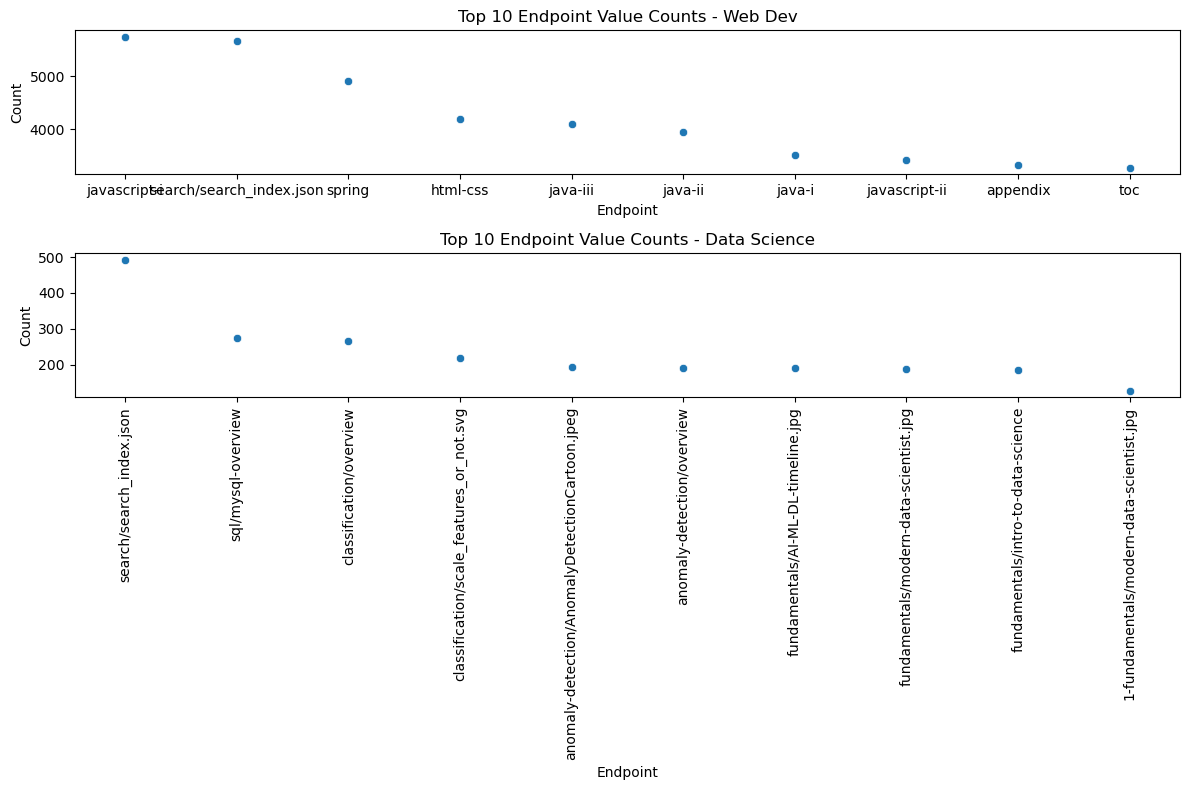

In [148]:
question6(df)